### Disclaimer: This dataset is originally from the National Institute of Diabetes and Digestiveand Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
#### Dataset description: It has 768 rows of data.
* 1. Pregnancies– Number of times pregnant
* 2. Glucose– Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* 3. BloodPressure– Diastolic blood pressure (mm Hg)
* 4. SkinThickness– Triceps skinfold thickness (mm)
* 5. Insulin- 2-Hour serum insulin (mu U/ml)
* 6. BMI – Body mass index (weight in kg/ (height in m)^2)
* 7. DiabetesPedigreeFunction– Diabetes pedigree function
* 8. Age- Age (years)
* 9. Outcome – Class variable (0 or 1) 268 of 768 are 1, the others are 0

#### Task: You will use the Pima Indian diabetes dataset. The dataset corresponds to a classification problem on which you need to make predictions on the basis of whether a person is to suffer diabetes given the 8 features in the dataset. You are asked to use this data to build a XGBoost Classifier model using scikit-learn. Tune the parameters using Grid Search and Randomized Search strategies.

### İmtina: Bu məlumat dəsti ilk olaraq Milli Diabet və Həzm İnstitutundandır və Böyrək Xəstəlikləri. Verilənlər dəstinin məqsədi diaqnostik olaraq olub olmadığını proqnozlaşdırmaqdır Diabetli bir xəstənin olmadığı müəyyən diaqnostik ölçmələrə əsaslanaraq daxil edilir verilənlər toplusu.
#### Dataset təsviri: 768 sıra verilənlərə malikdir.
* 1. Hamiləliklər – Hamilə qalmaların sayı
* 2. Qlükoza – Plazma qlükoza konsentrasiyası 2 saat ərzində oral qlükoza tolerantlıq testində
* 3. Qan təzyiqi – Diastolik qan təzyiqi (mm Hg)
* 4. SkinThickness – Triseps dəri qatının qalınlığı (mm)
* 5. İnsulin- 2 saatlıq serum insulini (mu U/ml)
* 6. BMI – Bədən kütləsi indeksi (çəki kq/ (m-də boy)^2)
* 7. DiabetesPedigree Function– Diabet damazlıq funksiyası
* 8. Yaş - Yaş (il)
* 9. Nəticə – Sinif dəyişəni (0 və ya 1) 768-dən 268-i 1, digərləri isə 0-dır

#### Tapşırıq: Siz Pima Hindistan diabet məlumat dəstindən istifadə edəcəksiniz. Verilənlər toplusu təsnifata uyğundur bir insanın əziyyət çəkib çəkməyəcəyinə əsaslanaraq proqnoz verməli olduğunuz problem Datasetdəki 8 xüsusiyyət verilmiş diabet. Sizdən XGBoost qurmaq üçün bu məlumatlardan istifadə etməyiniz xahiş olunur Scikit-learn istifadə edərək təsnifat modeli. Grid Search və Randomized Search istifadə edərək parametrləri tənzimləyin strategiyalar.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week6\day2\diabetes.csv')
df = data.copy()

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data understanding

### 1. Veri Tipini Yoxlayın

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### 2. Məlumatların Yoxluğu (Missing Data)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3. Məlumatların Dağılımı

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


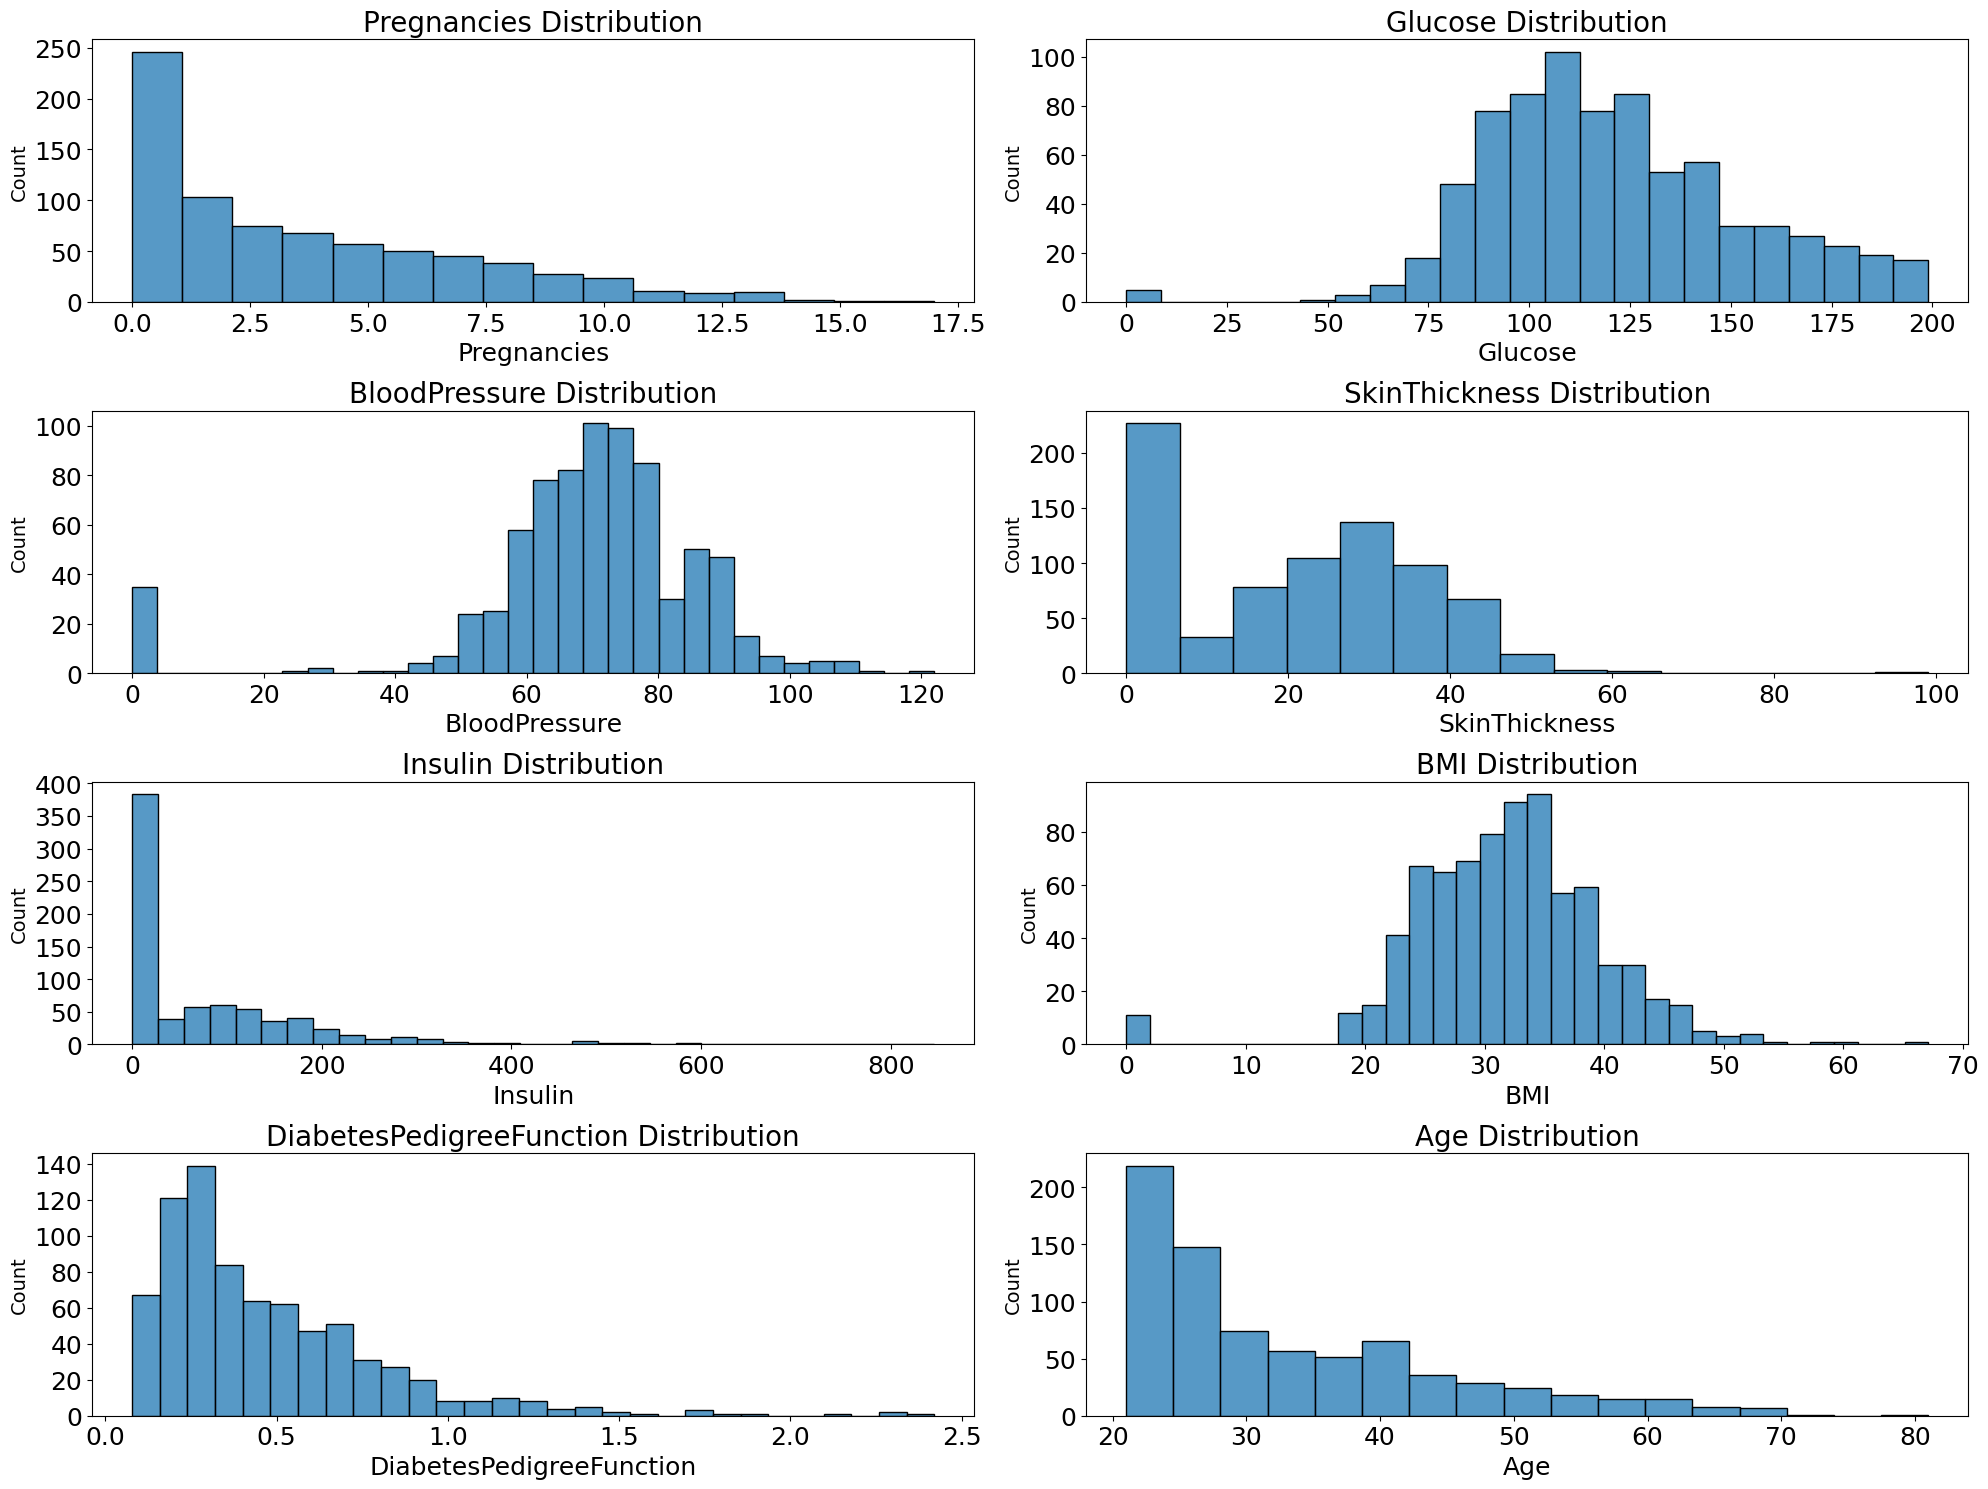

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot üçün istifadə ediləcək sütunların siyahısı
columns = df.columns[:-1]

# Qrafiklər üçün təsvir sahəsini böyütmək
plt.figure(figsize=(20, 15))

# Hər bir sütun üçün countplot yaratmaq
for i, column in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=column,)
    plt.title(f'{column} Distribution', fontsize=20)  # Başlıq üçün yazı ölçüsü
    plt.xlabel(column, fontsize=18)  # X oxu üçün yazı ölçüsü
    plt.ylabel('Count', fontsize=14)  # Y oxu üçün yazı ölçüsü
    plt.xticks(fontsize=18)  # X oxundakı dəyərlər üçün yazı ölçüsü
    plt.yticks(fontsize=18)  # Y oxundakı dəyərlər üçün yazı ölçüsü

plt.tight_layout()
plt.show()

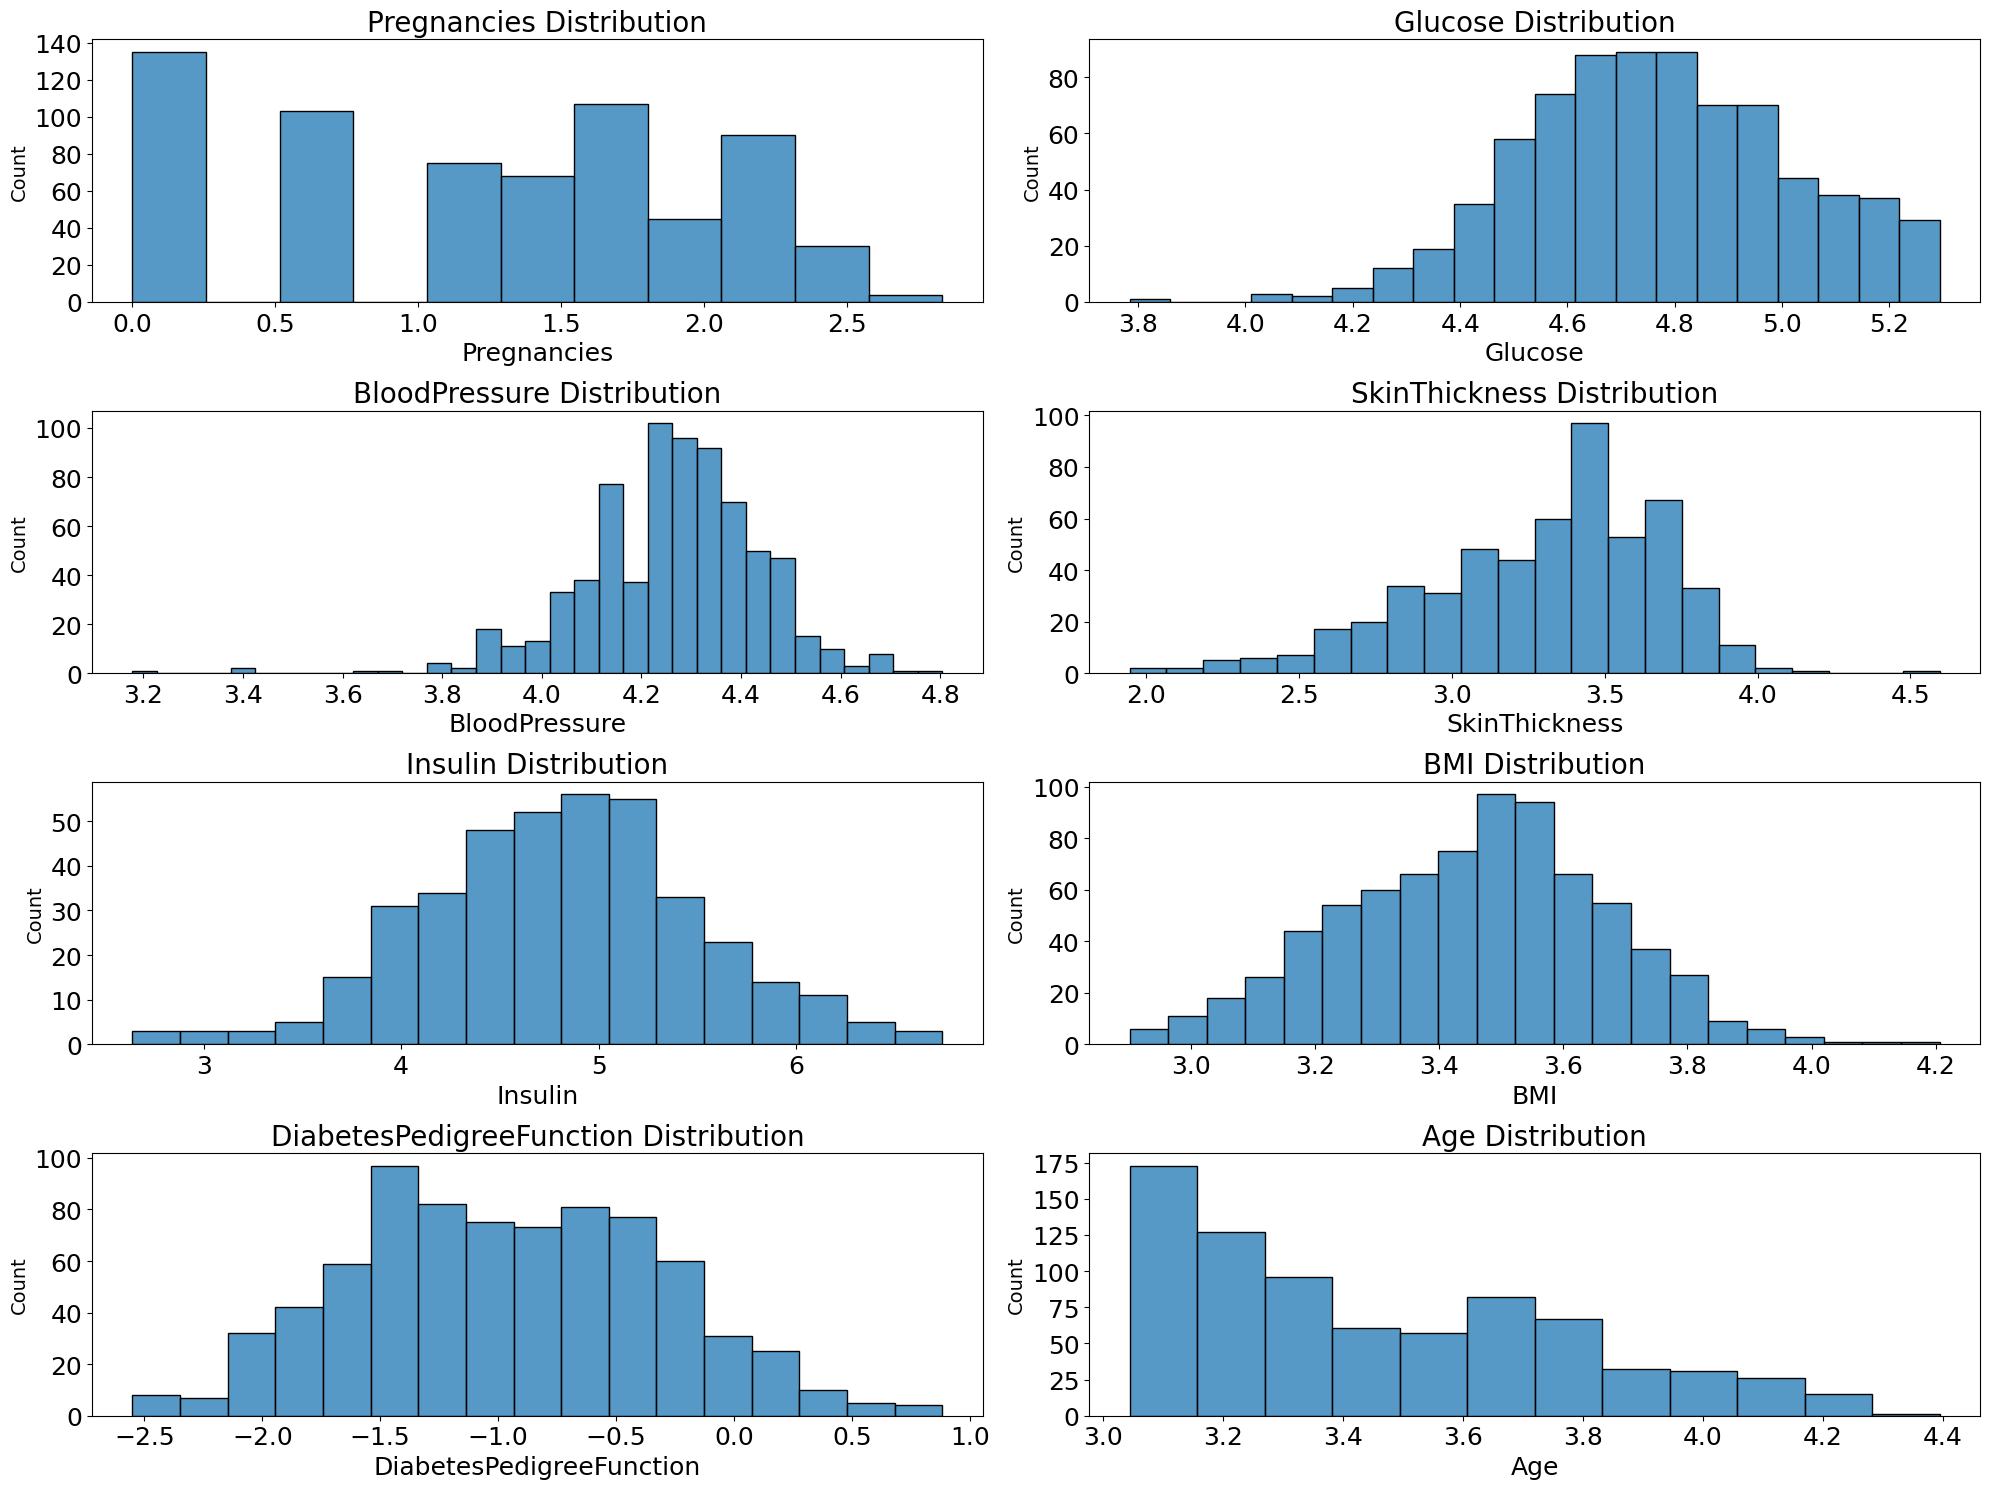

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot üçün istifadə ediləcək sütunların siyahısı
columns = df.columns[:-1]

# Qrafiklər üçün təsvir sahəsini böyütmək
plt.figure(figsize=(20, 15))

# Hər bir sütun üçün countplot yaratmaq
for i, column in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=np.log(df[column]))
    plt.title(f'{column} Distribution', fontsize=20)  # Başlıq üçün yazı ölçüsü
    plt.xlabel(column, fontsize=18)  # X oxu üçün yazı ölçüsü
    plt.ylabel('Count', fontsize=14)  # Y oxu üçün yazı ölçüsü
    plt.xticks(fontsize=18)  # X oxundakı dəyərlər üçün yazı ölçüsü
    plt.yticks(fontsize=18)  # Y oxundakı dəyərlər üçün yazı ölçüsü

plt.tight_layout()
plt.show()

#### 4. Kateqoriyal Dəyərlərin Paylanması

In [12]:
# kategorik deyer yoxdur

## 5. Hədəf Dəyişən (Target Variable) - imbalance problem

In [13]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df.Outcome.value_counts()[1] / df.Outcome.count()

0.3489583333333333

In [15]:
df.Outcome.value_counts()[0]/ df.Outcome.count()

0.6510416666666666

### 6. Məlumatların Əlaqəsi (Correlation)

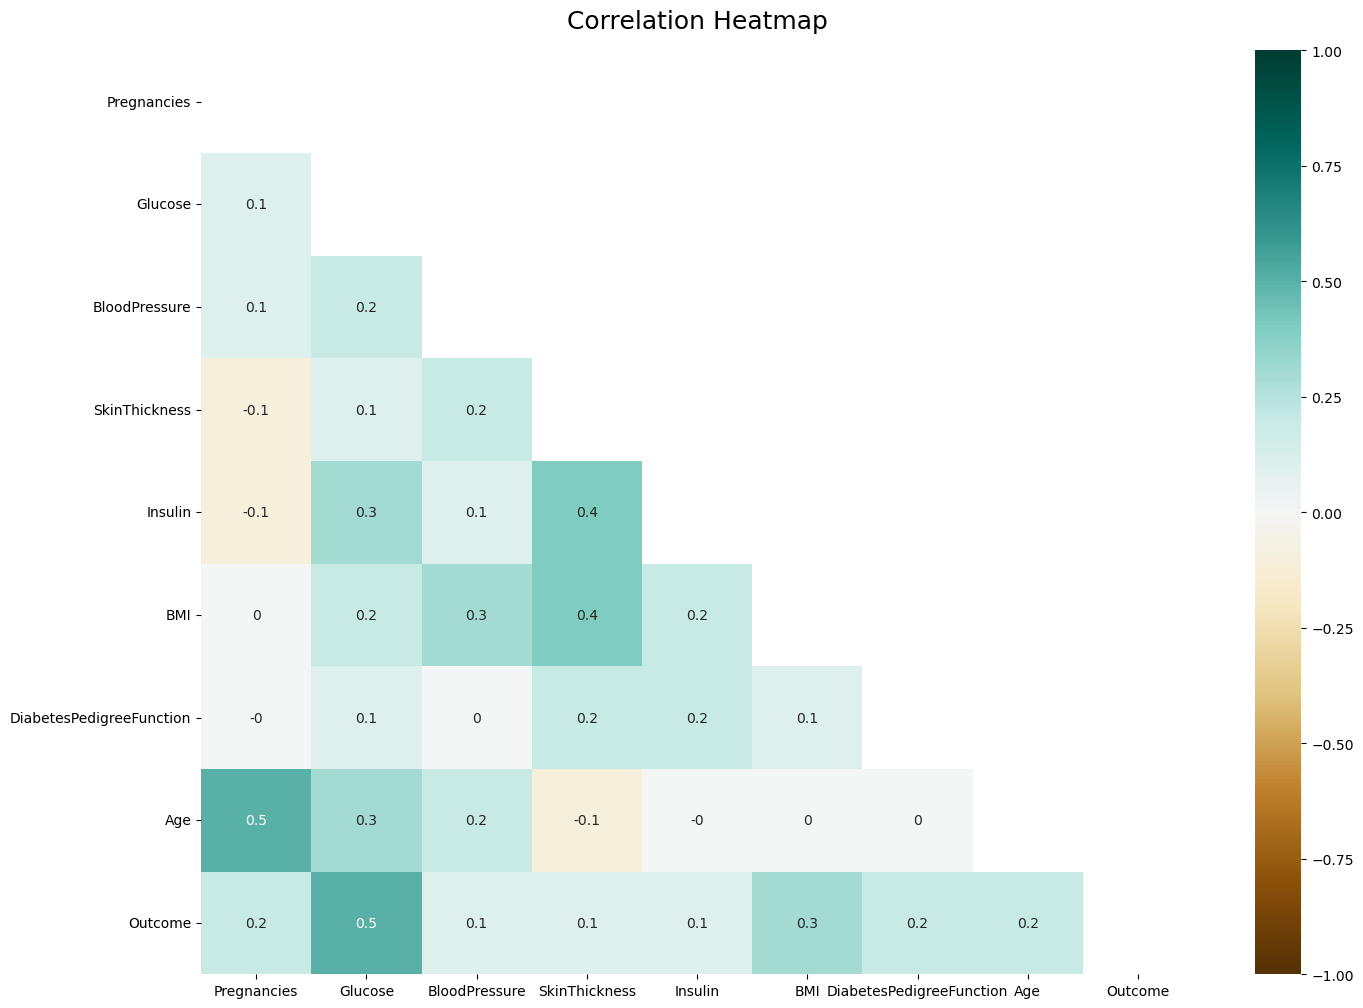

In [16]:
plt.figure(figsize=(16, 12))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype='bool'))

heatmap = sns.heatmap(round(df.corr(numeric_only=True),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

* Hamiləliklər – Hamilə qalmaların sayı
* Qlükoza – Plazma qlükoza konsentrasiyası 2 saat ərzində oral qlükoza tolerantlıq testində
* Qan təzyiqi – Diastolik qan təzyiqi (mm Hg)
* SkinThickness – Triseps dəri qatının qalınlığı (mm)
* İnsulin- 2 saatlıq serum insulini (mu U/ml)
* BMI – Bədən kütləsi indeksi (çəki kq/ (m-də boy)^2)
* DiabetesPedigree Function– Diabet damazlıq funksiyası
* Yaş - Yaş (il)
* Nəticə – Sinif dəyişəni (0 və ya 1) 768-dən 268-i 1, digərləri isə 0-dır

##  7. Pivotal Dəyişənlərin Təsiri

In [17]:
# pd.crosstab(df.Age, df.Outcome)

## 8. Outlier-ları Yoxlamaq

In [18]:
# plt.figure(figsize=(20, 50))
# ax = sns.boxplot(data=np.log(df+1), orient='h')
# ax.set_title('Diabets', fontsize=18)
# # ax.set(xscale = 'log')
# plt.show()

In [19]:
# plt.figure(figsize=(20, 50))
# ax = sns.boxplot(data=np.log(df), orient='h')
# ax.set_title('Diabets', fontsize=18)
# # ax.set(xscale = 'log')
# plt.show()

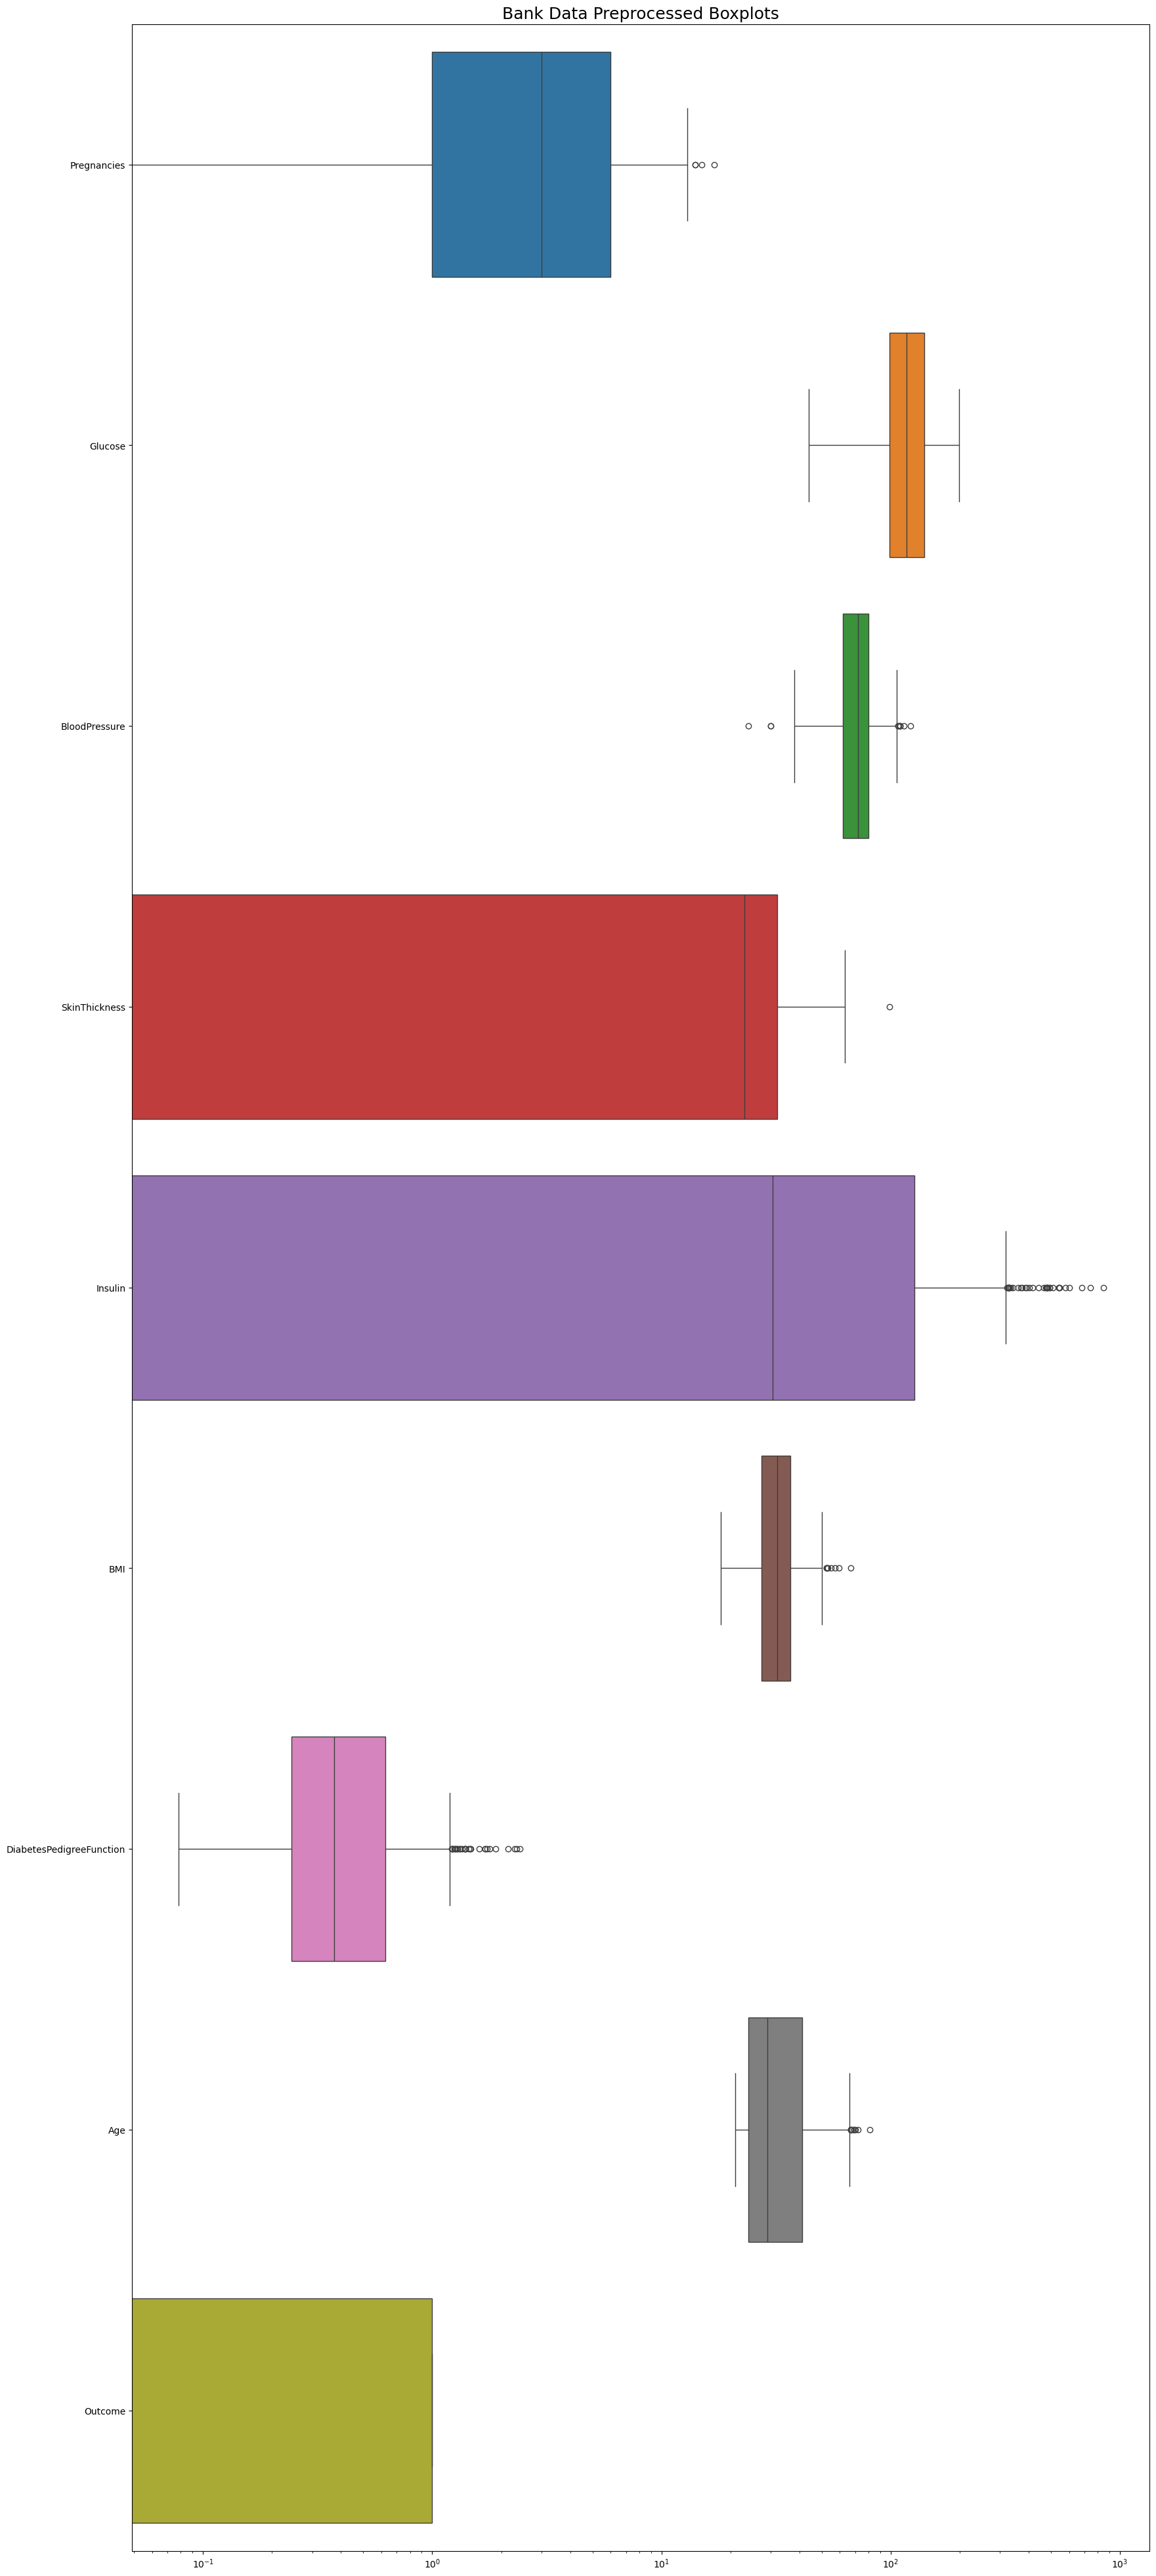

In [20]:
plt.figure(figsize=(20, 50))
ax = sns.boxplot(data=df, orient='h')
ax.set_title('Bank Data Preprocessed Boxplots', fontsize=18)
ax.set(xscale = 'log')
plt.show()

## Outlier-i IQR metodu ile sixdim amma modelin neticesi pislesdi
### Ferqli scaler-ler : RobustScaler, MinMaxScaler, StandardScaler hamsini yoxladim

In [38]:
# IQR istifadə edərək outlier-ləri sıxın
df_clipped = df.copy()

for col in df_clipped.columns:
    Q1 = df_clipped[col].quantile(0.25)
    Q3 = df_clipped[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier sərhədlərini müəyyən edin
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    # Outlier-ləri sıxın
    df_clipped[col] = df_clipped[col].clip(lower=lower_fence, upper=upper_fence)

df_clipped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72,23,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,0,0.0,30.1,0.349,47.0,1


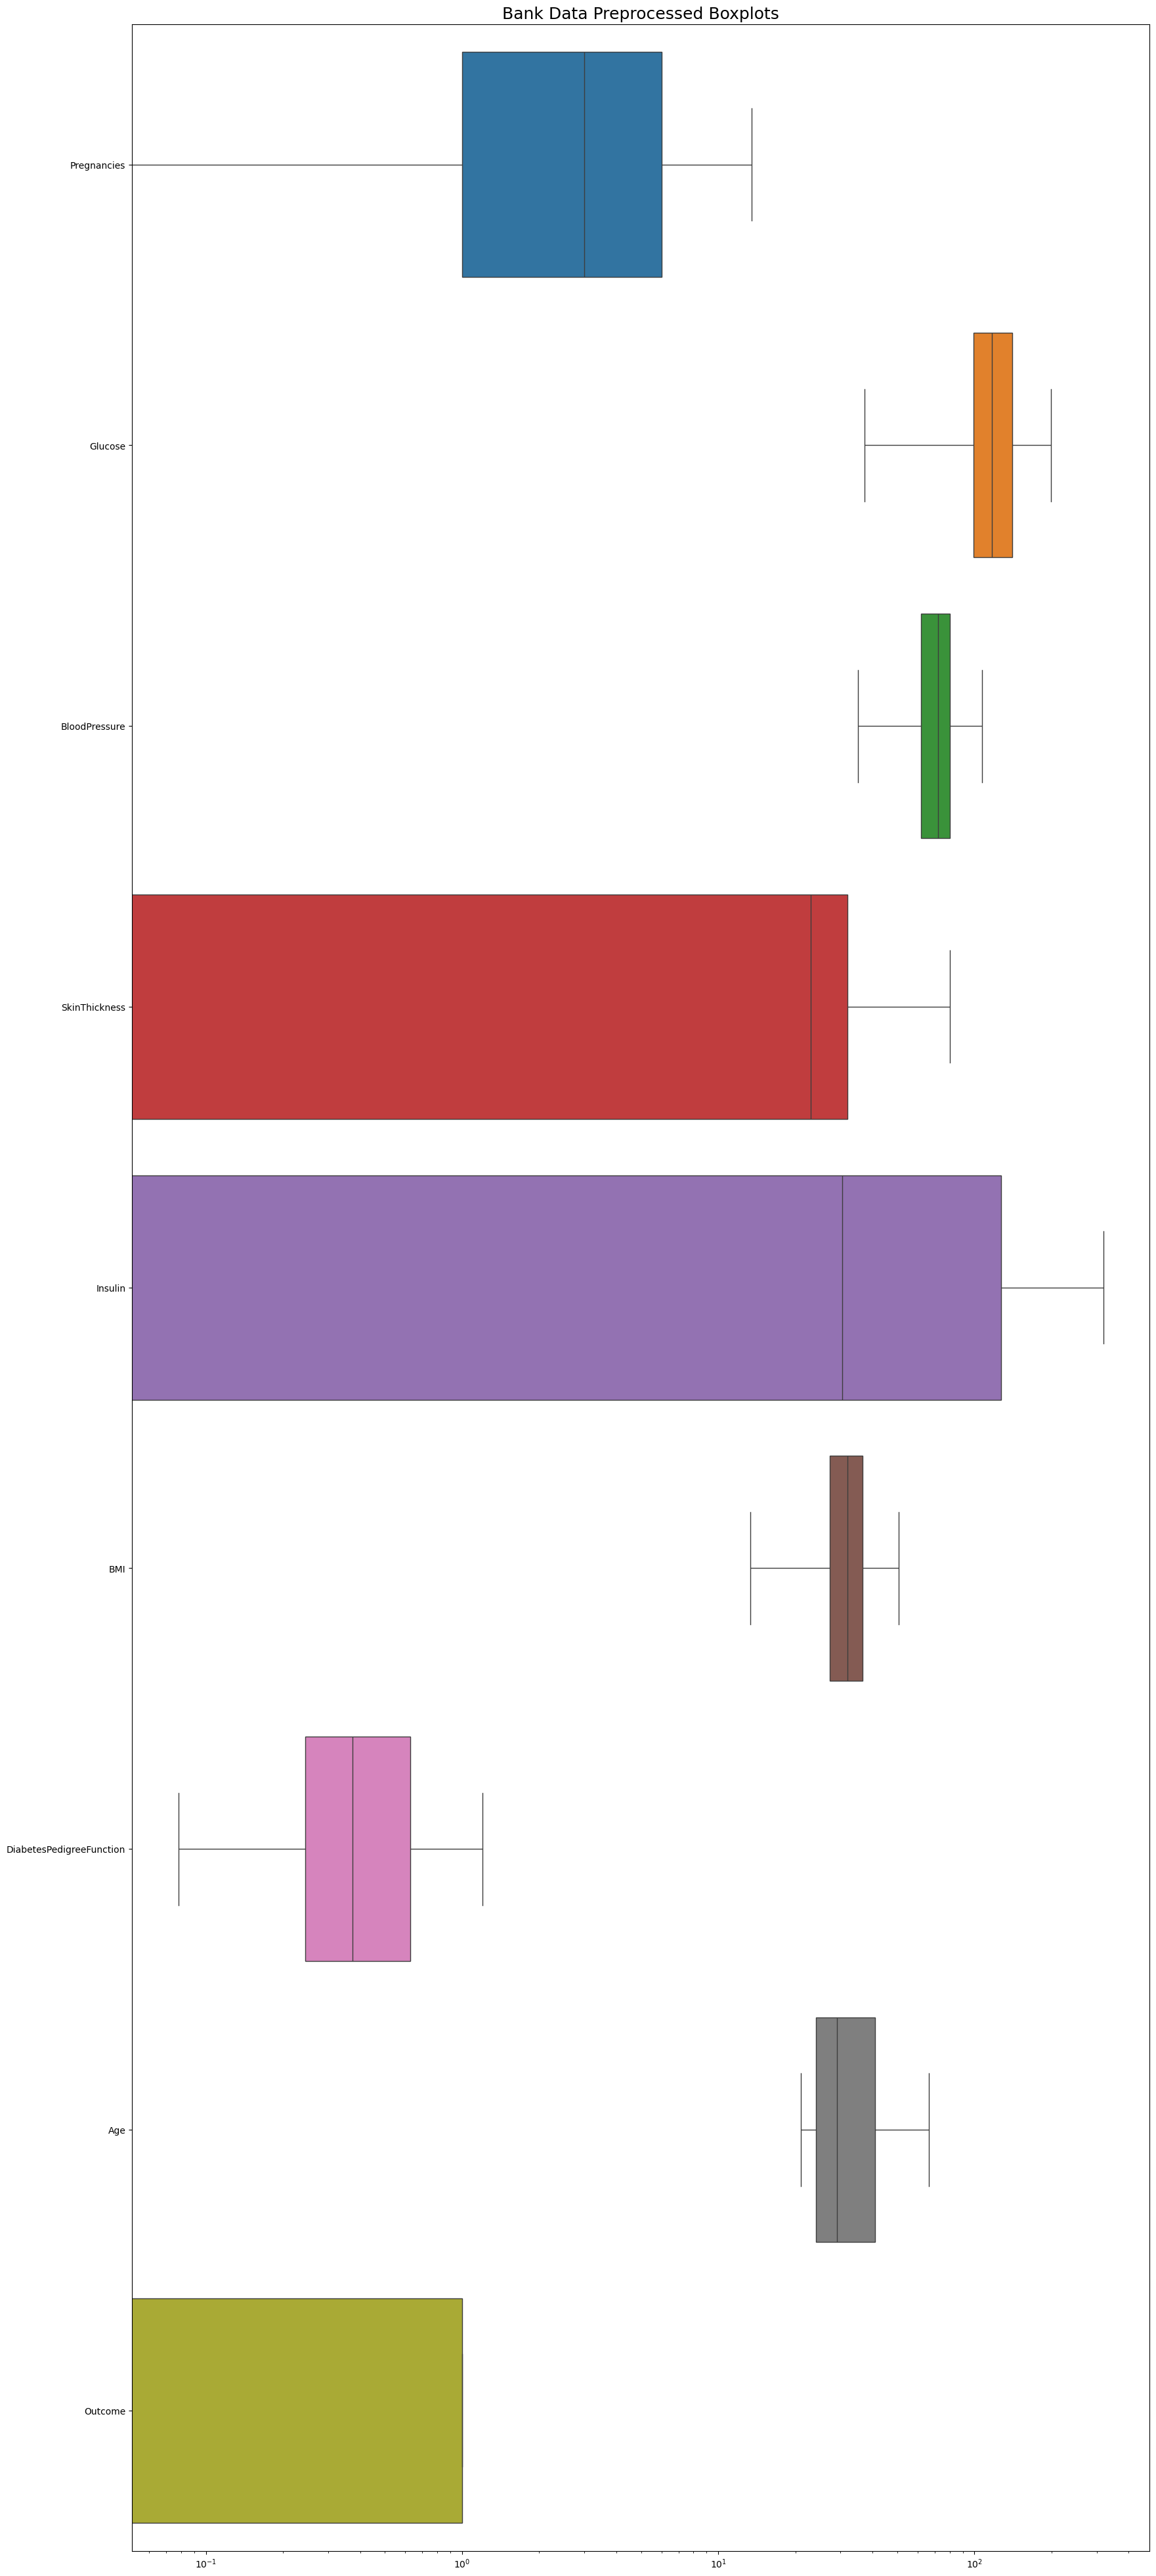

In [39]:
plt.figure(figsize=(20, 50))
ax = sns.boxplot(data=df_clipped, orient='h')
ax.set_title('Bank Data Preprocessed Boxplots', fontsize=18)
ax.set(xscale = 'log')
plt.show()

In [40]:
X = df_clipped.drop('Outcome', axis=1)
y = df_clipped['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_train_cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_train_cols)
X_test_cols = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_test_cols)

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgb_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgb_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgb_pred))
print('f1_score: ', f1_score(y_test, xgb_pred))
print('precision_score: ', precision_score(y_test, xgb_pred))
print('recall_score: ', recall_score(y_test, xgb_pred))
print()
print('classification_report:\n', classification_report(y_test, xgb_pred))

confusion  matrix:
 [[78 22]
 [21 33]]

accuracy:  0.7207792207792207
roc_auc_score:  0.6955555555555556
f1_score:  0.6055045871559633
precision_score:  0.6
recall_score:  0.6111111111111112

classification_report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       100
           1       0.60      0.61      0.61        54

    accuracy                           0.72       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.72      0.72       154



## Outlier sixmadan daha yaxsi netice verdi
### RobustSacle de istifade etdim 

In [45]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Train test split

In [82]:
df.shape

(768, 9)

In [83]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scaler

In [85]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_train_cols)
X_test_cols = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_test_cols)

## Sample XGBT

In [86]:
from xgboost import XGBClassifier

xgb_samp = XGBClassifier(use_label_encoder = False)

xgb_samp_fit = xgb_samp.fit(X_train, y_train)
xgb_pred = xgb_samp_fit.predict(X_test)
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgb_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgb_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgb_pred))
print('f1_score: ', f1_score(y_test, xgb_pred))
print('precision_score: ', precision_score(y_test, xgb_pred))
print('recall_score: ', recall_score(y_test, xgb_pred))
print()
print('classification_report:\n', classification_report(y_test, xgb_pred))

confusion  matrix:
 [[83 17]
 [22 32]]

accuracy:  0.7467532467532467
roc_auc_score:  0.7112962962962963
f1_score:  0.6213592233009708
precision_score:  0.6530612244897959
recall_score:  0.5925925925925926

classification_report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



## GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb_param = {
#              'booster': ['gbtree'],
             'n_estimators': [1,2,3,4,5,6,7,8,9,10],
             'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
#              'min_child_weight':[1, 3, 5],
#              'subsample':  [0.5, 0.8, 1.0],
#              'gamma': [0, 1, 5]
                }

xgb_grid = GridSearchCV(estimator=xgb, 
                        param_grid=xgb_param,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
#                         refit = True,
#                         verbose = 1
                       )

In [88]:
xgb_grid_fit = xgb_grid.fit(X_train, y_train)

cv_results_xgb = pd.DataFrame.from_dict(xgb_grid_fit.cv_results_)

xgb_top_rank = cv_results_xgb[cv_results_xgb['rank_test_score'] == 1]

In [89]:
xgb_top_rank 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
318,0.019714,0.001848,0.009206,0.002752,0.3,2,9,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",0.758065,0.806452,0.790323,0.741935,0.737705,0.770492,0.786885,0.721311,0.852459,0.786885,0.775251,0.036304,1,0.817029,0.807971,0.804348,0.798913,0.804702,0.804702,0.80651,0.801085,0.793852,0.792043,0.803115,0.006822


In [104]:
# Print the train and test score of the Support Vector Classifier

print('\n\n')
print('XGBT')
print(xgb_top_rank['mean_test_score'])
print(xgb_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(xgb_grid_fit.best_params_)




XGBT
318    0.775251
Name: mean_test_score, dtype: float64
318    0.803115
Name: mean_train_score, dtype: float64

 The best Parameters are : 
{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 9}


In [105]:
xgt_grid_pred = xgb_grid_fit.best_estimator_.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_grid_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgt_grid_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_grid_pred))
print('f1_score: ', f1_score(y_test, xgt_grid_pred))
print('precision_score: ', precision_score(y_test, xgt_grid_pred))
print('recall_score: ', recall_score(y_test, xgt_grid_pred))
print()
print('classification_report:\n', classification_report(y_test, xgt_grid_pred))

confusion  matrix:
 [[84 16]
 [25 29]]

accuracy:  0.7337662337662337
roc_auc_score:  0.6885185185185185
f1_score:  0.5858585858585859
precision_score:  0.6444444444444445
recall_score:  0.5370370370370371

classification_report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



## RandomizedSearchCV 
### variant 1

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb_param = {
#              'booster': ['gbtree'],
             'n_estimators': [1,2,3,4,5,6,7,8,9,10],
             'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
#              'min_child_weight':[1, 3, 5],
#              'subsample':  [0.5, 0.8, 1.0],
#              'gamma': [0, 1, 5]
                }

xgb_rs = RandomizedSearchCV(estimator=xgb,
                           param_distributions=xgb_param,
                           scoring='accuracy',
                           cv=5,
                           n_iter=10,
                           return_train_score=True,
                           random_state=1234,
                           verbose = 0)

In [108]:
xgb_rs_model = xgb_rs.fit(X_train, y_train)

In [111]:
cv_results_xgb_rs = pd.DataFrame.from_dict(xgb_rs_model .cv_results_)

xgb_top_rank_rs = cv_results_xgb_rs[cv_results_xgb_rs['rank_test_score'] == 1]

In [112]:
xgb_top_rank_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,1.256291,0.20097,0.028421,0.008738,7,2,0.5,"{'n_estimators': 7, 'max_depth': 2, 'learning_...",0.756098,0.772358,0.715447,0.756098,0.811475,0.762295,0.030956,1,0.826884,0.812627,0.820774,0.818737,0.808943,0.817593,0.006281


In [113]:
print('\n\n')
print('XGBT')
print(xgb_top_rank_rs['mean_test_score'])
# print(xgb_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(xgb_rs_model.best_params_)




XGBT
1    0.762295
Name: mean_test_score, dtype: float64

 The best Parameters are : 
{'n_estimators': 7, 'max_depth': 2, 'learning_rate': 0.5}


In [114]:
xgt_rs_pred = xgb_rs_model.best_estimator_.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_rs_pred ))
print()
print('accuracy: ', accuracy_score(y_test, xgt_rs_pred ))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_rs_pred ))
print('f1_score: ', f1_score(y_test, xgt_rs_pred ))
print('precision_score: ', precision_score(y_test, xgt_rs_pred ))
print('recall_score: ', recall_score(y_test, xgt_rs_pred ))
print()
print('classification_report:\n', classification_report(y_test, xgt_rs_pred ))

confusion  matrix:
 [[82 18]
 [24 30]]

accuracy:  0.7272727272727273
roc_auc_score:  0.6877777777777779
f1_score:  0.5882352941176471
precision_score:  0.625
recall_score:  0.5555555555555556

classification_report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



## RandomizedSearchCV
### variant 2  
* ChatGPT

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Parametr aralığı
param_dist = {
    'n_estimators': np.arange(50, 400, 50),       # Ağac sayı
    'max_depth': np.arange(3, 10),                # Ağacların dərinliyi
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Öyrənmə sürəti
    'subsample': np.linspace(0.5, 1.0, 5),        # Nümunə payı
    'colsample_bytree': np.linspace(0.5, 1.0, 5), # Xüsusiyyət payı
    'gamma': np.linspace(0, 0.5, 5),              # Bölünmə üçün minimum itki azaldılması
    'reg_alpha': np.linspace(0, 1, 5),            # L1 cəriməsi (Lasso)
    'reg_lambda': np.linspace(1, 2, 5),           # L2 cəriməsi (Ridge)
    'booster': ['gbtree', 'dart']                 # Booster növü
}

# Modelin yaradılması
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV obyektinin yaradılması
xgb_rs = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_dist, 
    n_iter=50,           # Təsadüfi kombinasiya sayı
    scoring='accuracy',   # Dəyərləndirmə kriteriyası
    cv=5,                 # Çarpaz təsdiqləmə qatları
    verbose=1,            # Geri bildirim səviyyəsi
    random_state=42,      # Təsadüfi toxum
    n_jobs=-1             # Bütün CPU nüvələrini istifadə et
)

# Modeli uyğunlaşdırmaq (fit)
xgb_rs_model = xgb_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [117]:
cv_results_xgb_rs = pd.DataFrame.from_dict(xgb_rs_model.cv_results_)

xgb_top_rank_rs = cv_results_xgb_rs[cv_results_xgb_rs['rank_test_score'] == 1]

In [118]:
xgb_top_rank_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.159113,0.015203,0.011008,0.002099,0.5,1.5,1.0,200,3,0.01,0.5,1.0,gbtree,"{'subsample': 0.5, 'reg_lambda': 1.5, 'reg_alp...",0.731707,0.804878,0.747967,0.772358,0.795082,0.770399,0.027576,1


In [119]:
# Print the train and test score of the Support Vector Classifier

print('\n\n')
print('XGBT')
print(xgb_top_rank_rs['mean_test_score'])
# print(xgb_top_rank_rs['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(xgb_rs_model.best_params_)




XGBT
27    0.770399
Name: mean_test_score, dtype: float64

 The best Parameters are : 
{'subsample': 0.5, 'reg_lambda': 1.5, 'reg_alpha': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0, 'booster': 'gbtree'}


In [120]:
xgt_rs_pred = xgb_rs_model.best_estimator_.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_rs_pred ))
print()
print('accuracy: ', accuracy_score(y_test, xgt_rs_pred ))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_rs_pred ))
print('f1_score: ', f1_score(y_test, xgt_rs_pred ))
print('precision_score: ', precision_score(y_test, xgt_rs_pred ))
print('recall_score: ', recall_score(y_test, xgt_rs_pred ))
print()
print('classification_report:\n', classification_report(y_test, xgt_rs_pred ))

confusion  matrix:
 [[86 14]
 [25 29]]

accuracy:  0.7467532467532467
roc_auc_score:  0.6985185185185186
f1_score:  0.5979381443298969
precision_score:  0.6744186046511628
recall_score:  0.5370370370370371

classification_report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       100
           1       0.67      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



## BayesSearchCV
### variant 1

In [124]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb_param = {
#              'booster': ['gbtree'],
             'n_estimators': [1,2,3,4,5,6,7,8,9,10],
             'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
#              'min_child_weight':[1, 3, 5],
#              'subsample':  [0.5, 0.8, 1.0],
#              'gamma': [0, 1, 5]
                }

xgb_bs = BayesSearchCV(XGBClassifier(),
                    search_spaces=xgb_param,
                    n_iter=32, 
                    random_state=0)

In [125]:
# executes bayesian optimization
xgb_bs_model = xgb_bs.fit(X_train, y_train)

In [127]:
cv_results_xgb_bs = pd.DataFrame.from_dict(xgb_bs_model.cv_results_)

xgb_top_rank_bs = cv_results_xgb_bs[cv_results_xgb_bs['rank_test_score'] == 1]

In [128]:
xgb_top_rank_bs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.046834,0.002317,0.021014,0.002899,0.3,2,9,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",0.739837,0.772358,0.731707,0.739837,0.803279,0.757404,0.026854,1


In [130]:
# Print the train and test score of the Support Vector Classifier

print('\n\n')
print('XGBT')
print(xgb_top_rank_bs['mean_test_score'])
# print(xgb_top_rank_rs['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(xgb_bs_model.best_params_)




XGBT
18    0.757404
Name: mean_test_score, dtype: float64

 The best Parameters are : 
OrderedDict([('learning_rate', 0.3), ('max_depth', 2), ('n_estimators', 9)])


In [131]:
xgt_bs_pred = xgb_bs_model.best_estimator_.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_bs_pred ))
print()
print('accuracy: ', accuracy_score(y_test, xgt_bs_pred ))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_bs_pred ))
print('f1_score: ', f1_score(y_test, xgt_bs_pred ))
print('precision_score: ', precision_score(y_test, xgt_bs_pred ))
print('recall_score: ', recall_score(y_test, xgt_rs_pred ))
print()
print('classification_report:\n', classification_report(y_test, xgt_bs_pred ))

confusion  matrix:
 [[84 16]
 [25 29]]

accuracy:  0.7337662337662337
roc_auc_score:  0.6885185185185185
f1_score:  0.5858585858585859
precision_score:  0.6444444444444445
recall_score:  0.5370370370370371

classification_report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



## BayesSearchCV
### variant 2
* ChatGPT

In [133]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier
import numpy as np

# Hiperparametr aralığı
search_spaces = {
    'n_estimators': (50, 400),                # Ağac sayı
    'learning_rate': (0.01, 0.3, 'log-uniform'), # Öyrənmə sürəti
    'max_depth': (3, 10),                     # Maksimum dərinlik
    'subsample': (0.5, 1.0),                  # Nümunə payı
    'colsample_bytree': (0.5, 1.0),           # Xüsusiyyət payı
    'gamma': (0, 0.5),                        # Minimum itki azaldılması
    'reg_alpha': (0, 1),                      # L1 cəriməsi (Lasso)
    'reg_lambda': (1, 2)                      # L2 cəriməsi (Ridge)
}

# Modelin yaradılması
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# BayesSearchCV obyektinin yaradılması
xgb_bs = BayesSearchCV(
    estimator=xgb, 
    search_spaces=search_spaces, 
    n_iter=30,            # Təsadüfi kombinasiya sayı
    scoring='accuracy',   # Dəyərləndirmə kriteriyası
    cv=3,                 # Çarpaz təsdiqləmə qatları
    n_jobs=-1,            # Bütün CPU nüvələrini istifadə et
    random_state=42       # Təsadüfi toxum
)

# Modeli uyğunlaşdırmaq (fit)
xgb_bs_model = xgb_bs.fit(X_train, y_train)

In [134]:
cv_results_xgb_bs = pd.DataFrame.from_dict(xgb_bs_model.cv_results_)

xgb_top_rank_bs = cv_results_xgb_bs[cv_results_xgb_bs['rank_test_score'] == 1]

In [135]:
xgb_top_rank_bs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,0.498353,0.037012,0.024693,0.006231,0.5,0.429908,0.01,3,400,0,2,0.5,"{'colsample_bytree': 0.5, 'gamma': 0.429908116...",0.75122,0.760976,0.789216,0.767137,0.016112,1


In [136]:
# Print the train and test score of the Support Vector Classifier

print('\n\n')
print('XGBT')
print(xgb_top_rank_bs['mean_test_score'])
# print(xgb_top_rank_rs['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(xgb_bs_model.best_params_)




XGBT
24    0.767137
Name: mean_test_score, dtype: float64

 The best Parameters are : 
OrderedDict([('colsample_bytree', 0.5), ('gamma', 0.4299081162731363), ('learning_rate', 0.01), ('max_depth', 3), ('n_estimators', 400), ('reg_alpha', 0), ('reg_lambda', 2), ('subsample', 0.5)])


In [137]:
xgt_bs_pred = xgb_bs_model.best_estimator_.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_bs_pred ))
print()
print('accuracy: ', accuracy_score(y_test, xgt_bs_pred ))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_bs_pred ))
print('f1_score: ', f1_score(y_test, xgt_bs_pred ))
print('precision_score: ', precision_score(y_test, xgt_bs_pred ))
print('recall_score: ', recall_score(y_test, xgt_rs_pred ))
print()
print('classification_report:\n', classification_report(y_test, xgt_bs_pred ))

confusion  matrix:
 [[85 15]
 [23 31]]

accuracy:  0.7532467532467533
roc_auc_score:  0.7120370370370369
f1_score:  0.62
precision_score:  0.6739130434782609
recall_score:  0.5370370370370371

classification_report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

